In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [20]:
file_path = '../data/hoon.csv'
hoon = pd.read_csv(file_path)
hoon

,campaigns,date,impressions,clicks
0,Hoon,2021-03-31,990,4
1,Hoon,2021-04-01,613,0
2,Hoon,2021-04-02,44025,7
3,Hoon,2021-04-03,12483,1
4,Hoon,2021-04-04,9830,4
5,Hoon,2021-04-05,8532,5
6,Hoon,2021-04-06,8746,4
7,Hoon,2021-04-07,5612,5
8,Hoon,2021-04-08,7248,3
9,Hoon,2021-04-09,7364,4


In [21]:
hoon1 = hoon.drop(['campaigns'], axis =1 )
hoon1

,date,impressions,clicks
0,2021-03-31,990,4
1,2021-04-01,613,0
2,2021-04-02,44025,7
3,2021-04-03,12483,1
4,2021-04-04,9830,4
5,2021-04-05,8532,5
6,2021-04-06,8746,4
7,2021-04-07,5612,5
8,2021-04-08,7248,3
9,2021-04-09,7364,4


In [22]:
hoon1['impressions'].dtypes

dtype('int64')

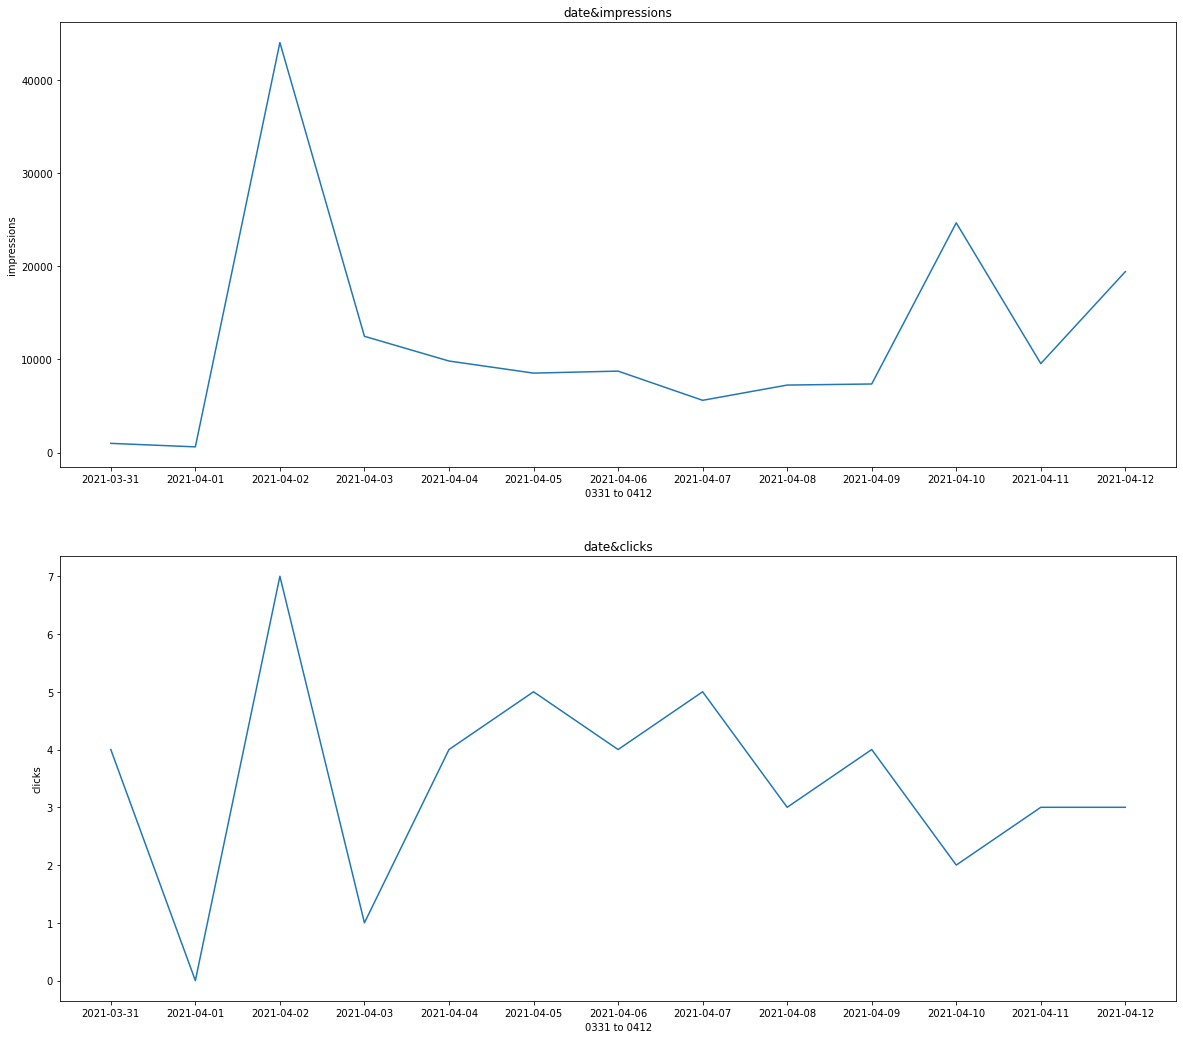

In [23]:
figure, axes = plt.subplots( 2, 1, figsize=(20,18))

sns.lineplot( x='date', y='impressions', data= hoon1, ax= axes[0])
sns.lineplot( x='date', y='clicks', data= hoon1, ax= axes[1])
axes[0].set_title('date&impressions')
axes[1].set_title('date&clicks')
axes[0].set_xlabel('0331 to 0412')
axes[1].set_xlabel('0331 to 0412')

plt.show()

In [26]:
df_imp = hoon1[['date','impressions']]
df_imp

,date,impressions
0,2021-03-31,990
1,2021-04-01,613
2,2021-04-02,44025
3,2021-04-03,12483
4,2021-04-04,9830
5,2021-04-05,8532
6,2021-04-06,8746
7,2021-04-07,5612
8,2021-04-08,7248
9,2021-04-09,7364


In [30]:
df_imp

,date,impressions
0,2021-03-31,990
1,2021-04-01,613
2,2021-04-02,44025
3,2021-04-03,12483
4,2021-04-04,9830
5,2021-04-05,8532
6,2021-04-06,8746
7,2021-04-07,5612
8,2021-04-08,7248
9,2021-04-09,7364


In [33]:
from fbprophet import Prophet

# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
df = df_imp.rename(columns={'date':'ds', 'impressions':'y'})
df

,ds,y
0,2021-03-31,990
1,2021-04-01,613
2,2021-04-02,44025
3,2021-04-03,12483
4,2021-04-04,9830
5,2021-04-05,8532
6,2021-04-06,8746
7,2021-04-07,5612
8,2021-04-08,7248
9,2021-04-09,7364


In [92]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=False,
                  weekly_seasonality=True, daily_seasonality=False,
                  changepoint_prior_scale=0.5)
prophet.fit(df)

/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.


In [93]:
# 5일을 내다보며 예측합니다.

In [105]:
future_data = prophet.make_future_dataframe(periods=10, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
18,2021-04-18,15830.785468,1212.434511,30528.456605
19,2021-04-19,16130.359744,2862.438907,30449.149627
20,2021-04-20,16429.934019,2147.633500,30401.079326
21,2021-04-21,16729.508295,4063.340158,31113.729648
22,2021-04-22,17029.082571,2321.135838,31407.926110


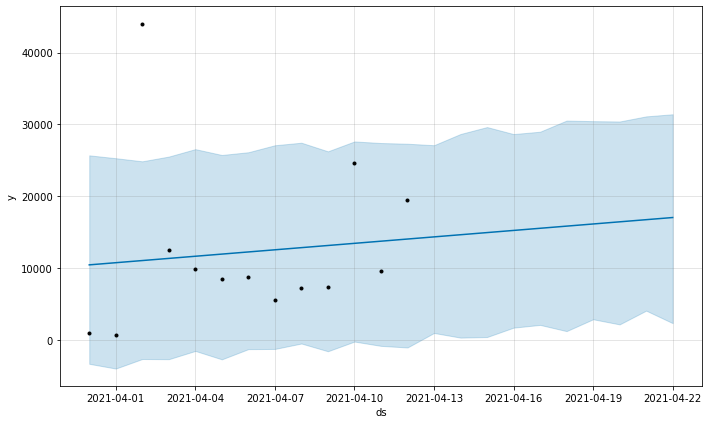

In [106]:
fig1 = prophet.plot(forecast_data)

In [107]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=False,
                  weekly_seasonality=False, daily_seasonality=False,
                  changepoint_prior_scale=0.5)
prophet.fit(df)

INFO:fbprophet:n_changepoints greater than number of observations.Using 9.


/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

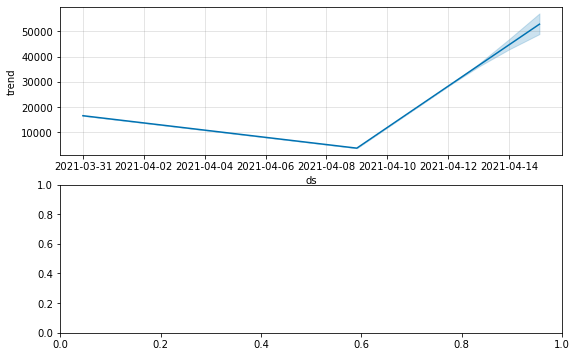

In [145]:
fig2 = prophet.plot_components(forecast_data)

In [110]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=False,
                  weekly_seasonality=True, daily_seasonality=False,
                  changepoint_prior_scale=0.5)


# prophet = Prophet(growth = 'logistic'
#                  , changepoint_prior_scale=0.5)

prophet.fit(df)

/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.


In [111]:
future_data = prophet.make_future_dataframe(periods=3, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


,ds,yhat,yhat_lower,yhat_upper
11,2021-04-11,11077.650260,6054.893001,16432.869805
12,2021-04-12,19690.510826,14746.109095,24724.173695
13,2021-04-13,33494.921500,28421.144794,38714.376938
14,2021-04-14,5929.461630,1195.624389,10791.095854
15,2021-04-15,7332.020561,2337.335807,12147.883061


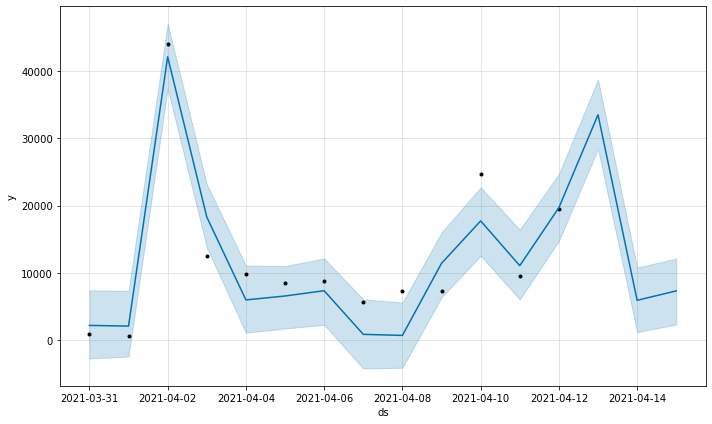

In [115]:
fig1 = prophet.plot(forecast_data)

In [120]:

#df.set_index('ds', inplace=True)


In [129]:
df.dtypes

y    int64
dtype: object

In [132]:
df.astype('float')
df

,y
ds,
2021-03-31,990
2021-04-01,613
2021-04-02,44025
2021-04-03,12483
2021-04-04,9830
2021-04-05,8532
2021-04-06,8746
2021-04-07,5612
2021-04-08,7248


# RandomForest

In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [143]:
file_path = '../data/hoon.csv'
hoon = pd.read_csv(file_path)
hoon

,campaigns,date,impressions,clicks
0,Hoon,2021-03-31,990,4
1,Hoon,2021-04-01,613,0
2,Hoon,2021-04-02,44025,7
3,Hoon,2021-04-03,12483,1
4,Hoon,2021-04-04,9830,4
5,Hoon,2021-04-05,8532,5
6,Hoon,2021-04-06,8746,4
7,Hoon,2021-04-07,5612,5
8,Hoon,2021-04-08,7248,3
9,Hoon,2021-04-09,7364,4
